In [1]:
# pip install mne

In [2]:
import numpy as np
import mne , glob
import matplotlib.pyplot as plt

from scipy.io import loadmat 

In [3]:
# matfiles = glob.glob('*.mat', *, recursive=True)

# data = {}
# matfiles
path = '**/*.mat'
matfiles = glob.glob(path, recursive=True)

for file in matfiles:
    print(file)

test_17_23\data\test_subject17.mat
test_17_23\data\test_subject18.mat
test_17_23\data\test_subject19.mat
test_17_23\data\test_subject20.mat
test_17_23\data\test_subject21.mat
test_17_23\data\test_subject22.mat
test_17_23\data\test_subject23.mat
train_01_16\train_subject01.mat
train_01_16\train_subject02.mat
train_01_16\train_subject03.mat
train_01_16\train_subject04.mat
train_01_16\train_subject05.mat
train_01_16\train_subject06.mat
train_01_16\train_subject07.mat
train_01_16\train_subject08.mat
train_01_16\train_subject09.mat
train_01_16\train_subject10.mat
train_01_16\train_subject11.mat
train_01_16\train_subject12.mat
train_01_16\train_subject13.mat
train_01_16\train_subject14.mat
train_01_16\train_subject15.mat
train_01_16\train_subject16.mat


In [4]:
s1 = loadmat(matfiles[0])

In [5]:
s1['Id'].shape

(594, 1)

In [6]:
s1['X'].shape

(594, 306, 375)

In [7]:
trials, channels, timepoints = s1['X'].shape

In [8]:
s1['X'][1].shape

(306, 375)

In [9]:
s1['X'][1][0].shape

(375,)

In [10]:
# Create metadata
n_channels = 306
sampling_freq = 250  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 306 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 306
 projs: []
 sfreq: 250.0 Hz
>


In [11]:
raws = [trials]

In [12]:
s1['X'][0]

array([[-7.7957788e-12, -2.7069668e-12, -1.0443457e-11, ...,
        -6.1788643e-12, -4.5415490e-12, -6.2753179e-12],
       [-2.4554599e-12, -6.0187463e-12, -9.4116338e-12, ...,
         1.4423123e-13,  5.1482489e-13, -1.6372557e-12],
       [-3.5717414e-13, -2.9026700e-13, -1.3969061e-13, ...,
         2.1617529e-13,  3.0794128e-13,  2.5482662e-13],
       ...,
       [ 9.1692912e-12,  5.2496189e-12, -9.1070619e-13, ...,
        -2.8394774e-12, -2.2926721e-13,  7.2876757e-12],
       [-2.5345080e-12, -3.6946989e-13,  2.5026962e-12, ...,
        -1.5143288e-11, -5.5773806e-12, -6.7419321e-12],
       [-1.4030679e-13, -1.1761080e-13, -9.4211151e-14, ...,
        -4.6767969e-14, -8.0054846e-14,  2.5460186e-14]], dtype=float32)

In [13]:
s1['X'][1]

array([[ 5.7172028e-12, -3.6510499e-12, -3.6334705e-12, ...,
         8.6968540e-12,  3.6210052e-12, -2.1096152e-12],
       [-4.5974973e-12,  1.5247038e-12,  6.8372439e-12, ...,
         1.5466018e-12,  9.1944707e-12,  3.3497181e-12],
       [ 2.5374594e-13,  3.8059619e-13,  4.6095631e-13, ...,
        -2.3313204e-13,  5.7179603e-14,  4.7462482e-14],
       ...,
       [ 2.5321821e-12, -4.8709105e-12, -7.4867071e-13, ...,
        -5.1867208e-12, -5.2468745e-12, -1.9842322e-12],
       [ 8.4903673e-12,  6.2228855e-12,  2.2992045e-14, ...,
        -3.0908148e-13, -6.9960650e-13,  1.0138307e-11],
       [ 8.5583403e-14,  7.4799758e-14,  4.4715382e-15, ...,
         1.6169486e-13, -2.9331989e-14, -6.1717738e-16]], dtype=float32)

In [14]:
raws[0] = mne.io.RawArray(s1['X'][0], info)

Creating RawArray with float64 data, n_channels=306, n_times=375
    Range : 0 ... 374 =      0.000 ...     1.496 secs
Ready.


In [15]:
raws[0]

<RawArray | 306 x 375 (1.5 s), ~1.2 MB, data loaded>

Using matplotlib as 2D backend.


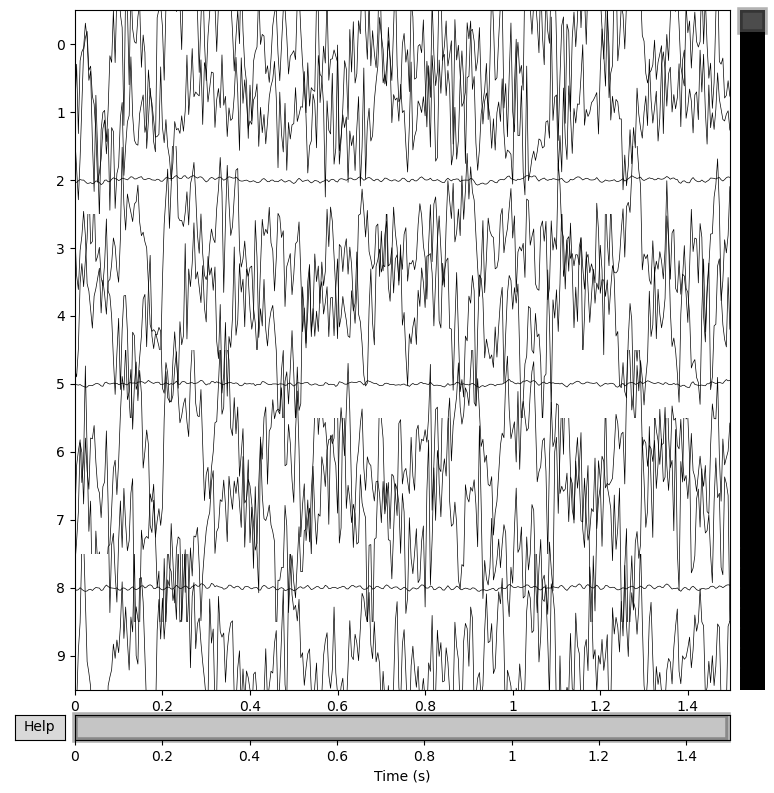

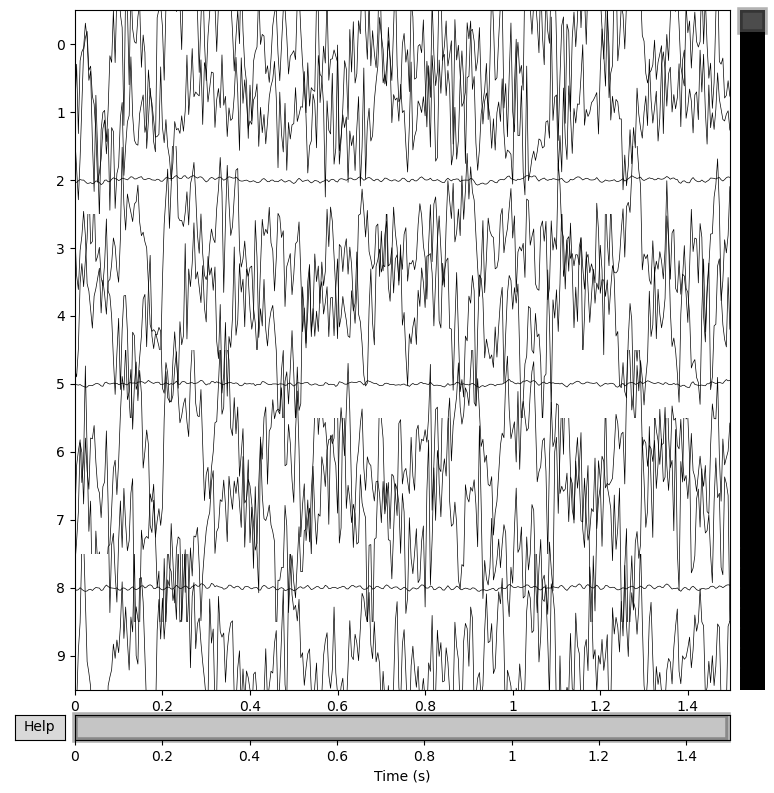

In [16]:
raws[0].plot(show_scrollbars=True, show_scalebars=False,n_channels=10)

In [17]:
# raws[0].compute_psd().plot()
# raws[0].plot(duration=5, n_channels=30)

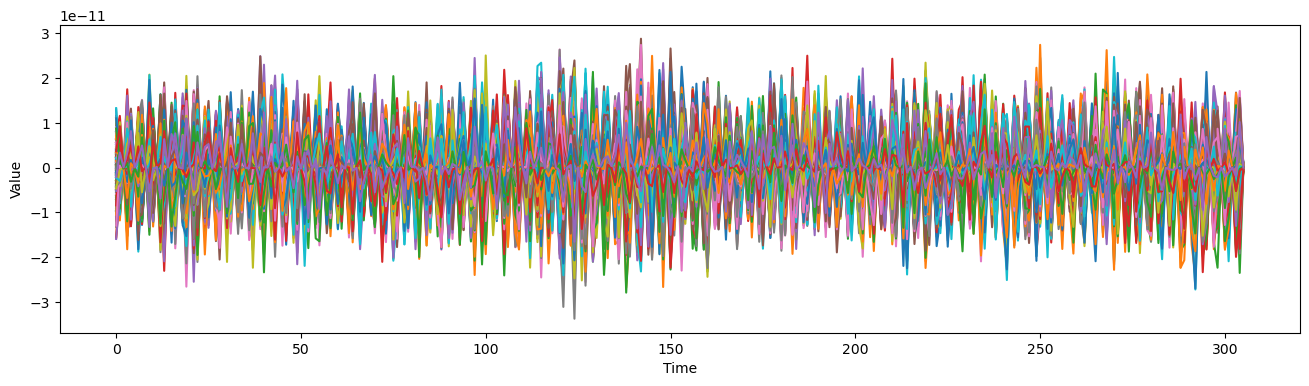

In [18]:
# Plotting the signal from the first channel from the first trail
plt.figure(figsize=(16,4))
plt.plot(s1['X'][1])
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

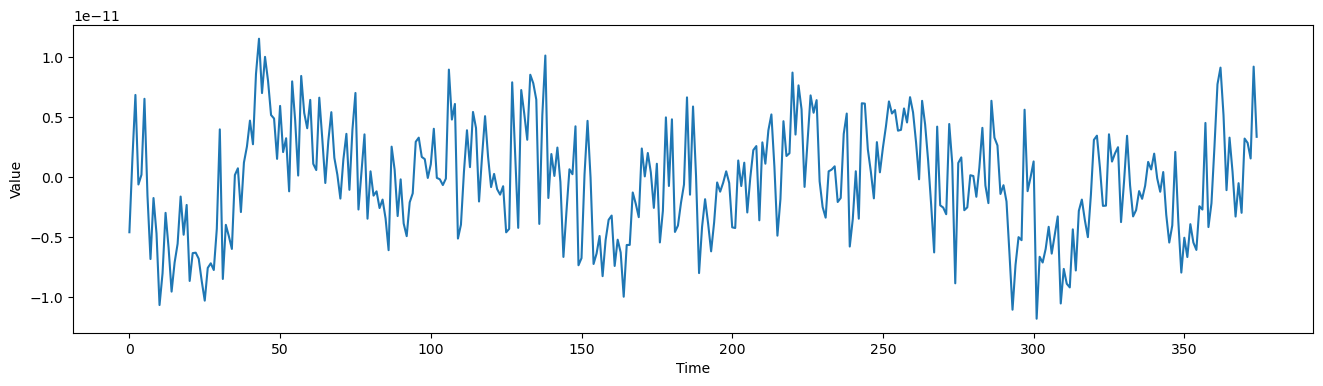

In [19]:
# Plotting the signal from the first channel from the first trail
plt.figure(figsize=(16,4))
plt.plot(s1['X'][1][1])
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [20]:
# data shape manipulation